In [1]:
import pandas as pd
import numpy as np

In [39]:
'''A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If
your data deals with multiple classes, you can take any two classes. Steps below (refer below
diagram for understanding):
• Calculate the mean for each class (also called as class centroid)
(Suggestion: You may use numpy.mean() function for finding the average vector for all
vectors in a given class. Please define the axis property appropriately to use this function. EX:
feat_vecs.mean(axis=0))
• Calculate spread (standard deviation) for each class
(Suggestion: You may use numpy.std() function for finding the standard deviation vector
for all vectors in a given class. Please define the axis property appropriately to use this
function.)
• Calculate the distance between mean vectors between classes
(Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean
distance between two centroids.)'''

'A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If\nyour data deals with multiple classes, you can take any two classes. Steps below (refer below\ndiagram for understanding):\n• Calculate the mean for each class (also called as class centroid)\n(Suggestion: You may use numpy.mean() function for finding the average vector for all\nvectors in a given class. Please define the axis property appropriately to use this function. EX:\nfeat_vecs.mean(axis=0))\n• Calculate spread (standard deviation) for each class\n(Suggestion: You may use numpy.std() function for finding the standard deviation vector\nfor all vectors in a given class. Please define the axis property appropriately to use this\nfunction.)\n• Calculate the distance between mean vectors between classes\n(Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean\ndistance between two centroids.)'

In [3]:
df = pd.read_csv('/Users/triahavijayekkumaran/downloads/nearest-earth-objects(1910-2024) 2.csv')

In [5]:
features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']

In [21]:
df = df[features + ['is_hazardous']].dropna()

In [23]:
X = df[features].values
y = df['is_hazardous'].values

In [25]:
y = y.astype(int)

In [27]:
class_non_hazardous = X[y == 0]
class_hazardous = X[y == 1]

In [29]:
centroid_non_hazardous = np.mean(class_non_hazardous, axis=0)
centroid_hazardous = np.mean(class_hazardous, axis=0)

In [31]:
spread_non_hazardous = np.std(class_non_hazardous, axis=0)
spread_hazardous = np.std(class_hazardous, axis=0)

In [33]:
interclass_distance = np.linalg.norm(centroid_non_hazardous - centroid_hazardous)

In [35]:
print("Non-Hazardous NEOs Centroid:", centroid_non_hazardous)
print("Hazardous NEOs Centroid:", centroid_hazardous)
print("Spread (Standard Deviation) of Non-Hazardous NEOs:", spread_non_hazardous)
print("Spread (Standard Deviation) of Hazardous NEOs:", spread_hazardous)
print("Interclass Distance between Non-Hazardous and Hazardous NEOs:", interclass_distance)

Non-Hazardous NEOs Centroid: [2.33155792e+01 1.38020958e-01 3.08624245e-01 4.91713470e+04
 4.15874595e+07]
Hazardous NEOs Centroid: [2.03143783e+01 2.93082636e-01 6.55352698e-01 6.39689411e+04
 4.11801528e+07]
Spread (Standard Deviation) of Non-Hazardous NEOs: [2.88136243e+00 3.11453612e-01 6.96431449e-01 2.56578049e+04
 2.07646200e+07]
Spread (Standard Deviation) of Hazardous NEOs: [1.34140733e+00 2.96545108e-01 6.63095020e-01 2.77483732e+04
 2.08351818e+07]
Interclass Distance between Non-Hazardous and Hazardous NEOs: 407575.39446004253


In [59]:
'''A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and
variance from the available data.
(Suggestion: numpy.histogram()gives the histogram data. Plot of histogram may be
achieved with matplotlib.pyplot.hist())'''

'A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the\nhistogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and\nvariance from the available data.\n(Suggestion: numpy.histogram()gives the histogram data. Plot of histogram may be\nachieved with matplotlib.pyplot.hist())'

In [41]:
import matplotlib.pyplot as plt

In [43]:
feature = 'relative_velocity'

In [47]:
data = df[feature].dropna()

In [49]:
hist, bin_edges = np.histogram(data, bins=10)

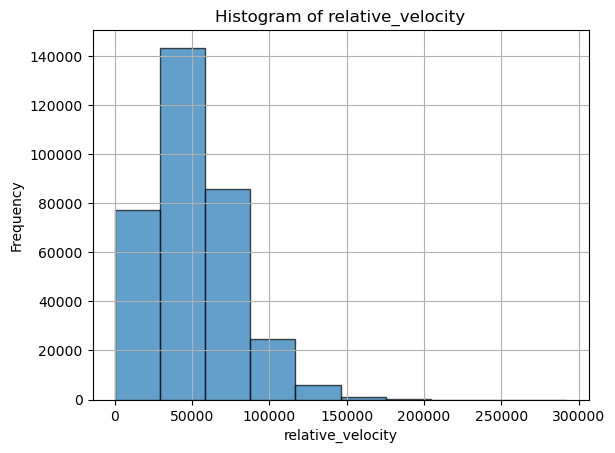

In [53]:
plt.hist(data, bins=10, edgecolor='black', alpha=0.7)  # You can adjust the number of bins here too
plt.xlabel('relative_velocity')
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature}')
plt.grid(True)
plt.show()

In [55]:
mean_value = np.mean(data)
variance_value = np.var(data)

In [57]:
print(f"Mean of {feature}: {mean_value}")
print(f"Variance of {feature}: {variance_value}")

Mean of relative_velocity: 51060.01799447809
Variance of relative_velocity: 696953864.4975481


In [63]:
'''Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1
to 10. Make a plot of the distance and observe the nature of this graph.'''

'Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1\nto 10. Make a plot of the distance and observe the nature of this graph.'

In [61]:
from scipy.spatial import distance

In [65]:
feature1 = 'absolute_magnitude'
feature2 = 'relative_velocity'

In [67]:
vector1 = df[feature1].dropna().values
vector2 = df[feature2].dropna().values

In [69]:
min_length = min(len(vector1), len(vector2))
vector1 = vector1[:min_length]
vector2 = vector2[:min_length]

In [71]:
r_values = list(range(1, 11))
minkowski_distances = [distance.minkowski(vector1, vector2, r) for r in r_values]

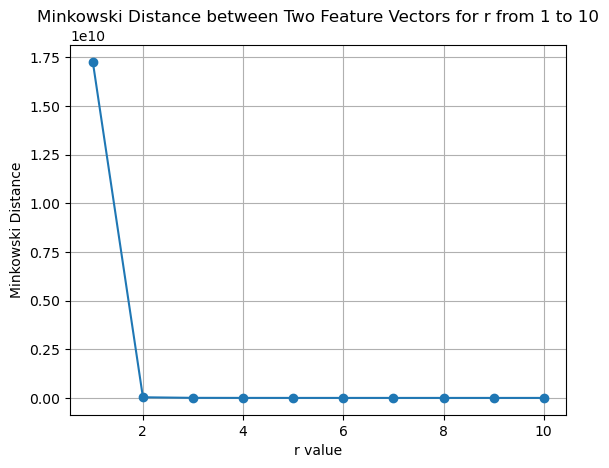

In [73]:
plt.plot(r_values, minkowski_distances, marker='o')
plt.xlabel('r value')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance between Two Feature Vectors for r from 1 to 10')
plt.grid(True)
plt.show()

In [75]:
for r, dist in zip(r_values, minkowski_distances):
    print(f"Minkowski distance with r={r}: {dist}")

Minkowski distance with r=1: 17259262230.312656
Minkowski distance with r=2: 33415116.23075527
Minkowski distance with r=3: 4419682.32703473
Minkowski distance with r=4: 1666299.0562133223
Minkowski distance with r=5: 951468.7779986416
Minkowski distance with r=6: 667713.4027153093
Minkowski distance with r=7: 527386.101056924
Minkowski distance with r=8: 449139.7392262055
Minkowski distance with r=9: 402727.477114773
Minkowski distance with r=10: 374323.68971661216


In [77]:
'''A4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the traintest_split() function available in SciKit. See below sample code for help:
>>> import numpy as np
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X is the feature vector set for your project and y is the class levels for vectors present in X.
Note: Before set split, make sure you have only two classes. If your project deals with multi-class
problem, take any two classes from them.'''

'A4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the traintest_split() function available in SciKit. See below sample code for help:\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)\nX is the feature vector set for your project and y is the class levels for vectors present in X.\nNote: Before set split, make sure you have only two classes. If your project deals with multi-class\nproblem, take any two classes from them.'

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
features = ['absolute_magnitude', 'relative_velocity']
target = 'is_hazardous'

In [83]:
X = df[features].dropna()
y = df[target].dropna().astype(int)

In [85]:
X = X.loc[y.index]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Training set features shape:", X_train.shape)
print("Test set features shape:", X_test.shape)
print("Training set labels shape:", y_train.shape)
print("Test set labels shape:", y_test.shape)

Training set size: 236719
Test set size: 101452
Training set features shape: (236719, 2)
Test set features shape: (101452, 2)
Training set labels shape: (236719,)
Test set labels shape: (101452,)


In [91]:
'''A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. '''

'A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. '

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [95]:
knn = KNeighborsClassifier(n_neighbors=3)

In [97]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
y_pred = knn.predict(X_test)

In [101]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [103]:
print("kNN Classifier (k=3) Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

kNN Classifier (k=3) Accuracy: 0.8401312936166857

Confusion Matrix:
 [[82537  6076]
 [10143  2696]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     88613
           1       0.31      0.21      0.25     12839

    accuracy                           0.84    101452
   macro avg       0.60      0.57      0.58    101452
weighted avg       0.82      0.84      0.83    101452



In [105]:
'''Test the accuracy of the kNN using the test set obtained from above exercise. Following code for
help.
>>> neigh.score(X_test, y_test)'''

'Test the accuracy of the kNN using the test set obtained from above exercise. Following code for\nhelp.\n>>> neigh.score(X_test, y_test)'

In [107]:
accuracy = knn.score(X_test, y_test)

In [109]:
print("Accuracy of kNN Classifier (k=3) on Test Set:", accuracy)

Accuracy of kNN Classifier (k=3) on Test Set: 0.8401312936166857


In [111]:
'''A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.
>>> neigh.predict(X_test)
Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the
class of the test vector (test_vect is any feature vector from your test set).'''

'A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.\nneigh.predict(X_test)\nPerform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the\nclass of the test vector (test_vect is any feature vector from your test set).'

In [113]:
print("Predicted Classes for the Test Set:")
print(y_pred)

Predicted Classes for the Test Set:
[0 0 0 ... 0 0 0]


In [115]:
test_vect = X_test.iloc[0].values.reshape(1, -1)  # Reshape for a single prediction
predicted_class = knn.predict(test_vect)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [117]:
print(f"\nPredicted Class for the given test vector {test_vect.flatten()}: {predicted_class[0]}")


Predicted Class for the given test vector [   26.        20674.6051094]: 0


In [119]:
'''A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to
11 and make an accuracy plot.'''

'A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to\n11 and make an accuracy plot.'

In [121]:
accuracies = []

In [123]:
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with k={k}: {accuracy:.4f}")


Accuracy with k=1: 0.8263
Accuracy with k=2: 0.8604
Accuracy with k=3: 0.8401
Accuracy with k=4: 0.8622
Accuracy with k=5: 0.8512
Accuracy with k=6: 0.8651
Accuracy with k=7: 0.8587
Accuracy with k=8: 0.8676
Accuracy with k=9: 0.8636
Accuracy with k=10: 0.8693
Accuracy with k=11: 0.8672


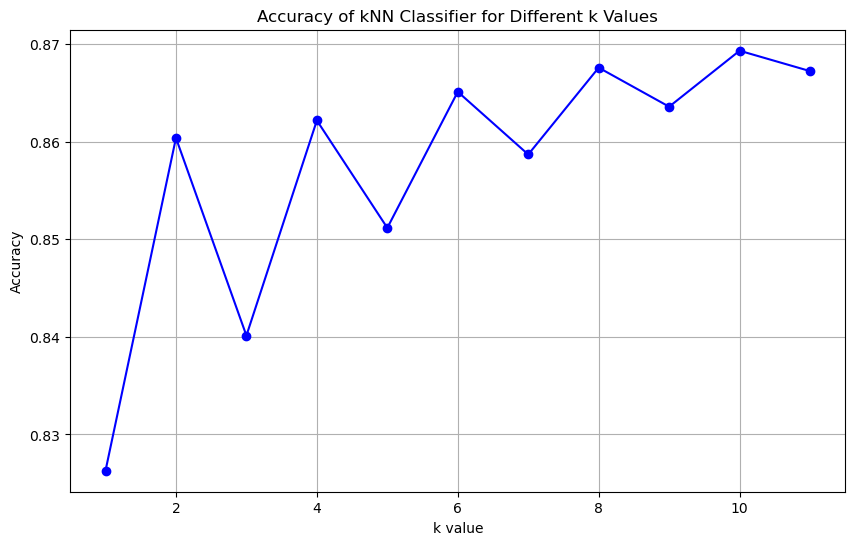

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN Classifier for Different k Values')
plt.grid(True)
plt.show()

In [127]:
'''A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).'''

'A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the\nother performance metrics such as precision, recall and F1-Score measures for both training and test\ndata. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).'

In [129]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [131]:
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Data:")
print(train_conf_matrix)

Confusion Matrix for Training Data:
[[204661   1735]
 [ 27558   2765]]


In [133]:
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Test Data:")
print(test_conf_matrix)


Confusion Matrix for Test Data:
[[87468  1145]
 [12324   515]]


In [135]:
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    206396
           1       0.61      0.09      0.16     30323

    accuracy                           0.88    236719
   macro avg       0.75      0.54      0.55    236719
weighted avg       0.85      0.88      0.83    236719



In [137]:
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     88613
           1       0.31      0.04      0.07     12839

    accuracy                           0.87    101452
   macro avg       0.59      0.51      0.50    101452
weighted avg       0.80      0.87      0.82    101452



In [139]:
'''Create a normal distribution data, plot the graph and compare the normal distribution plot
against the histogram plot.'''

'Create a normal distribution data, plot the graph and compare the normal distribution plot\nagainst the histogram plot.'

In [141]:
import seaborn as sns

In [143]:
mean = 0 
std_dev = 1
num_samples = 1000  

In [145]:
normal_data = np.random.normal(mean, std_dev, num_samples)

In [147]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: ylabel='Density'>

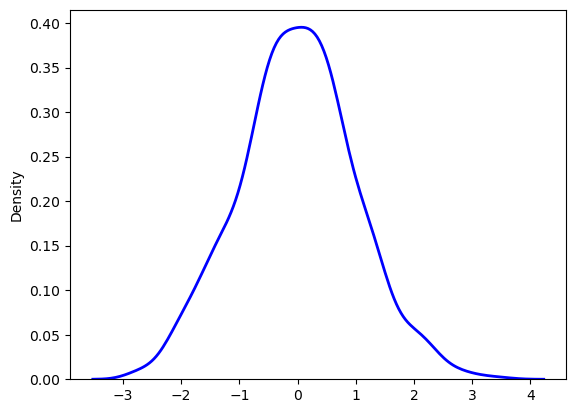

In [149]:
sns.kdeplot(normal_data, color='blue', label='Normal Distribution (KDE)', linewidth=2)

(array([0.02407458, 0.00481492, 0.03851933, 0.0914834 , 0.07222374,
        0.12518781, 0.15407731, 0.17333697, 0.20222646, 0.27926512,
        0.3370441 , 0.41408276, 0.39963801, 0.37074852, 0.41408276,
        0.40445293, 0.32259936, 0.22630104, 0.18778172, 0.18778172,
        0.13000273, 0.05296407, 0.05777899, 0.06259391, 0.04333424,
        0.00962983, 0.00962983, 0.00962983, 0.00481492, 0.00481492]),
 array([-2.76062724, -2.55293929, -2.34525134, -2.13756338, -1.92987543,
        -1.72218748, -1.51449953, -1.30681157, -1.09912362, -0.89143567,
        -0.68374772, -0.47605976, -0.26837181, -0.06068386,  0.14700409,
         0.35469205,  0.56238   ,  0.77006795,  0.9777559 ,  1.18544386,
         1.39313181,  1.60081976,  1.80850771,  2.01619566,  2.22388362,
         2.43157157,  2.63925952,  2.84694747,  3.05463543,  3.26232338,
         3.47001133]),
 <BarContainer object of 30 artists>)

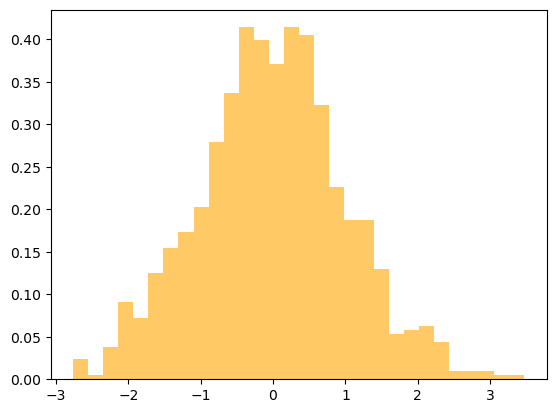

In [151]:
plt.hist(normal_data, bins=30, density=True, color='orange', alpha=0.6, label='Histogram')

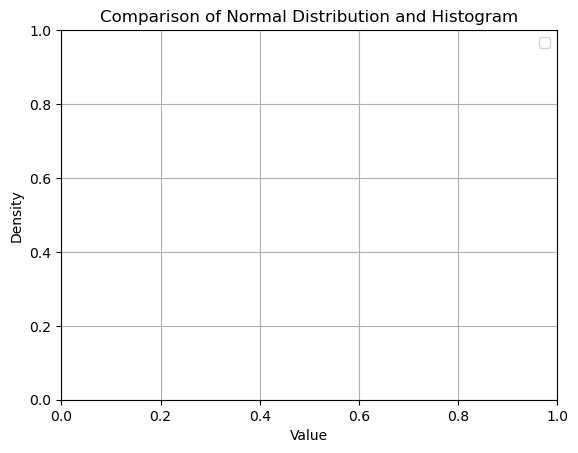

In [155]:
plt.title('Comparison of Normal Distribution and Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(['Histogram', 'Normal Distribution (KDE)'])
plt.grid(True)

plt.show()